In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styles
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [4]:
# Load dataset with compatible encoding
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

# View the first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Step 3: Explore basic structure
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
df.info()
df.describe()


Shape of dataset: (9994, 21)

Column Names: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Step 4: Check for missing values and duplicates
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values per column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Duplicate rows: 0


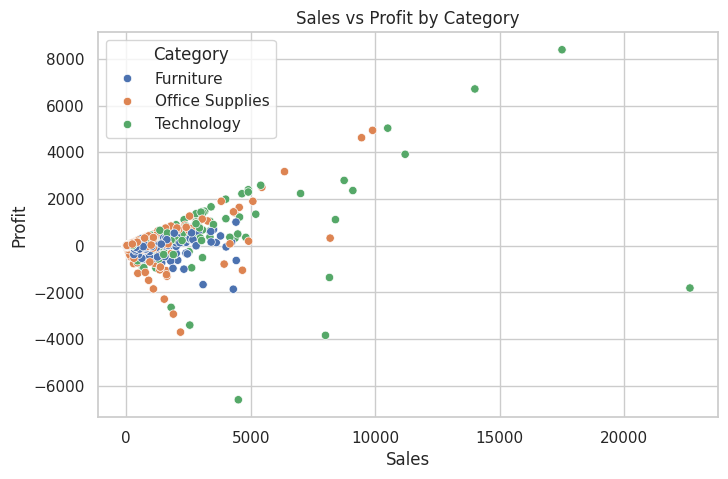

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title("Sales vs Profit by Category")
plt.show()


/tmp/ipython-input-8-2744563352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Sales', palette='Set2')


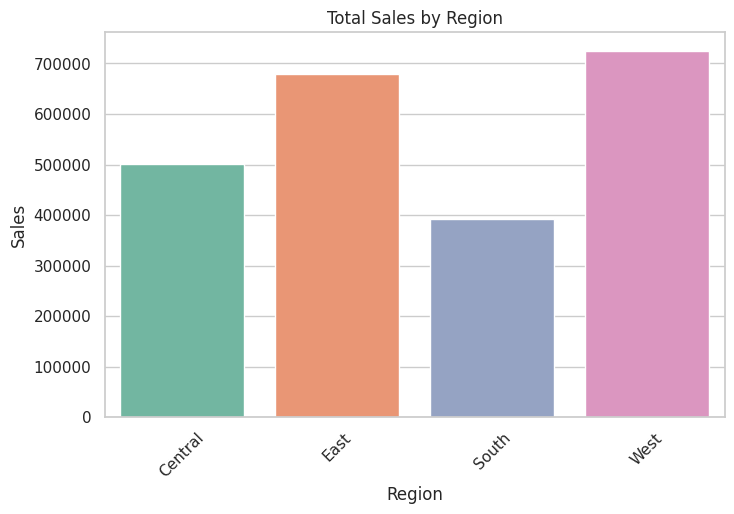

In [8]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='Set2')
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()


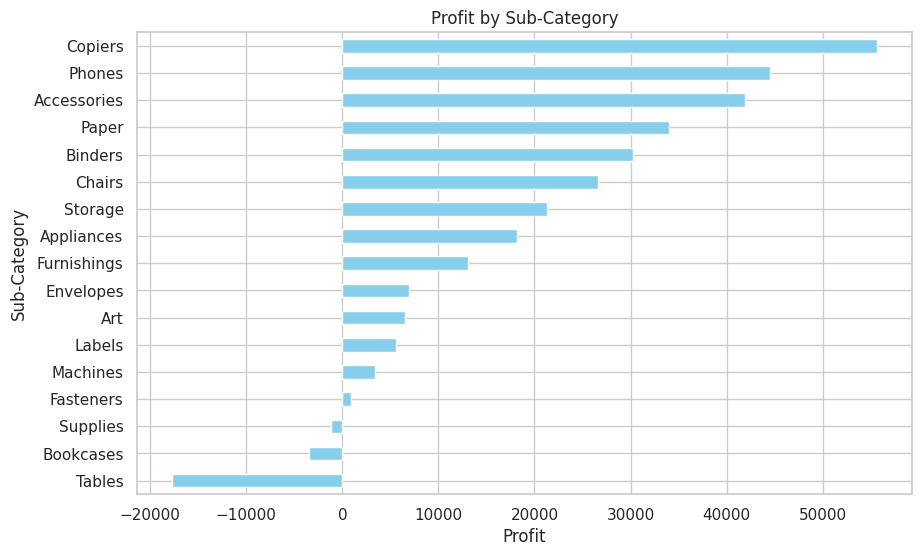

In [9]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(10,6))
subcat_profit.plot(kind='barh', color='skyblue')
plt.title("Profit by Sub-Category")
plt.xlabel("Profit")
plt.ylabel("Sub-Category")
plt.grid(True)
plt.show()


## 📊 Key Observations from EDA:

- There’s no strong correlation between sales and profit — some products with very high sales are actually leading to losses.
- Sub-categories like **Tables** and **Bookcases** often result in negative profits, indicating they might be over-discounted or poorly priced.
- **Technology** category seems to contribute the highest profit margin across all regions.
- The **Western region** leads in total sales, but the **Central** and **Southern regions** also perform well in terms of profit.
- The **Standard Class** ship mode is used most frequently, though it may not always be the most profitable.
- A few sub-categories like **Binders** and **Copiers** generate good profit with relatively lower sales volume — these could be optimized further.
- Discounts seem to negatively affect profit in several cases — a deeper discount analysis might be needed to identify loss-making patterns.

🧠 These insights can help the business focus on high-performing products and regions while rethinking pricing or promotional strategies on loss-heavy sub-categories.
